# This notebook demonstrates performance of shallow vs. deep neural network. Deeper neural network would have better performance as the number of parameter required to learn increase
Source: https://ojs.aaai.org/index.php/AAAI/article/view/10913

In [95]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
# !pip install --upgrade --user h5py # I use this so solve the tensorflow problem
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Activation

pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Generate sample data

In [97]:
np.random.seed(42)

# generate 120K random samples
uniform_samples = np.random.uniform(-2 * np.pi, 2 * np.pi, 120000)

# randomly select 60K as training and 60K as testing
X_train = np.array(np.random.choice(uniform_samples, size = 60000, replace = False))
X_test = np.array(np.setdiff1d(uniform_samples, train_data))

In [98]:
# print out the dimension of the data
# X_train.reshape((60000, 1))
X_train.shape

(60000,)

## Define the sparse trigonometric polynomial function

In [100]:
def func(x):
    return 2 * (2 * (np.cos(x) ** 2) - 1) ** 2 - 1

# generate y through func()
y_train = func(X_train)
y_test = func(X_test)

## Build the model structures

In [113]:
# 1 hidden layer

def creat_model_1_layer(units_item):
    
    model = keras.models.Sequential()

    # hidden layer 1
    model.add(Dense(units = units_item, input_shape=(1,)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(rate = 0.25))

    # output layer (unit = 1 for regression)
    model.add(Dense(units = 1))
    model.add(Activation("relu"))

    # compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001),
                  loss="mse",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [114]:
# 2 hidden layers

def creat_model_2_layer(units_item):
    
    model = keras.models.Sequential()

    # hidden layer 1
    model.add(Dense(units = units_item, input_shape=(1,)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(rate = 0.25))

    # hidden layer 2
    model.add(Dense(units = units_item))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(rate = 0.25))

    # output layer (unit = 1 for regression)
    model.add(Dense(units = 1))
    model.add(Activation("relu"))

    # compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001),
                  loss="mse",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

In [115]:
# 3 hidden layers

def creat_model_3_layer(units_item):
    
    model = keras.models.Sequential()

    # hidden layer 1
    model.add(Dense(units = units_item, input_shape=(1,)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(rate = 0.25))
    
    # hidden layer 2
    model.add(Dense(units = units_item))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(rate = 0.25))
    
    # hidden layer 3
    model.add(Dense(units = units_item))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Dropout(rate = 0.25))

    # output layer (unit = 1 for regression)
    model.add(Dense(units = 1))
    model.add(Activation("relu"))

    # compile
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.0001),
                  loss="mse",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

## Train the models

In [ ]:
# the units of neurons I want to try
units_list = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

In [116]:
# 1 hidden layer

rmse_1 = []

for i, value in enumerate(units_list):
    
    # train the nn model on training set
    model = creat_model_1_layer(units_list[i]) 
    model.fit(X_train, y_train, batch_size = 3000, epochs=30, validation_split=0.2)
    
    # get prediction from testing set
    score = model.evaluate(X_test, y_test)
    rmse_1.append(score[1]) # score[0] is the loss
    model.summary()

Epoch 1/30
16/16 [==============================] - 3s 53ms/step - loss: 0.5331 - root_mean_squared_error: 0.7302 - val_loss: 0.4930 - val_root_mean_squared_error: 0.7021
Epoch 2/30
16/16 [==============================] - 0s 16ms/step - loss: 0.5304 - root_mean_squared_error: 0.7283 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 3/30
16/16 [==============================] - 0s 12ms/step - loss: 0.5279 - root_mean_squared_error: 0.7266 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 4/30
16/16 [==============================] - 0s 21ms/step - loss: 0.5236 - root_mean_squared_error: 0.7236 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 5/30
16/16 [==============================] - 0s 16ms/step - loss: 0.5242 - root_mean_squared_error: 0.7240 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7014
Epoch 6/30
16/16 [==============================] - 0s 15ms/step - loss: 0.5209 - root_mean_squared_error: 0.7217 - val_loss: 0.4920 - val_root_m

In [117]:
# 2 hidden layers

rmse_2 = []

for i, value in enumerate(units_list):
    
    # train the nn model on training set
    model = creat_model_2_layer(units_list[i]) 
    model.fit(X_train, y_train, batch_size = 3000, epochs=30, validation_split=0.2)
    
    # get prediction from testing set
    score = model.evaluate(X_test, y_test)
    rmse_2.append(score[1]) # score[0] is the loss
    model.summary()

Epoch 1/30
16/16 [==============================] - 5s 58ms/step - loss: 0.9856 - root_mean_squared_error: 0.9928 - val_loss: 0.5508 - val_root_mean_squared_error: 0.7422
Epoch 2/30
16/16 [==============================] - 0s 17ms/step - loss: 0.9442 - root_mean_squared_error: 0.9717 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269
Epoch 3/30
16/16 [==============================] - 0s 24ms/step - loss: 0.9257 - root_mean_squared_error: 0.9621 - val_loss: 0.5114 - val_root_mean_squared_error: 0.7152
Epoch 4/30
16/16 [==============================] - 0s 17ms/step - loss: 0.8823 - root_mean_squared_error: 0.9393 - val_loss: 0.5013 - val_root_mean_squared_error: 0.7081
Epoch 5/30
16/16 [==============================] - 0s 16ms/step - loss: 0.8685 - root_mean_squared_error: 0.9320 - val_loss: 0.4975 - val_root_mean_squared_error: 0.7054
Epoch 6/30
16/16 [==============================] - 0s 20ms/step - loss: 0.8453 - root_mean_squared_error: 0.9194 - val_loss: 0.4994 - val_root_m

In [118]:
# 3 hidden layers

rmse_3 = []

for i, value in enumerate(units_list):
    
    # train the nn model on training set
    model = creat_model_3_layer(units_list[i]) 
    model.fit(X_train, y_train, batch_size = 3000, epochs=30, validation_split=0.2)
    
    # get prediction from testing set
    score = model.evaluate(X_test, y_test)
    rmse_3.append(score[1]) # score[0] is the loss
    model.summary()

Epoch 1/30
16/16 [==============================] - 5s 50ms/step - loss: 1.2943 - root_mean_squared_error: 1.1377 - val_loss: 0.6164 - val_root_mean_squared_error: 0.7851
Epoch 2/30
16/16 [==============================] - 0s 20ms/step - loss: 1.2204 - root_mean_squared_error: 1.1047 - val_loss: 0.5746 - val_root_mean_squared_error: 0.7580
Epoch 3/30
16/16 [==============================] - 0s 25ms/step - loss: 1.1530 - root_mean_squared_error: 1.0738 - val_loss: 0.5521 - val_root_mean_squared_error: 0.7430
Epoch 4/30
16/16 [==============================] - 0s 20ms/step - loss: 1.0891 - root_mean_squared_error: 1.0436 - val_loss: 0.5353 - val_root_mean_squared_error: 0.7317
Epoch 5/30
16/16 [==============================] - 0s 24ms/step - loss: 1.0349 - root_mean_squared_error: 1.0173 - val_loss: 0.5242 - val_root_mean_squared_error: 0.7240
Epoch 6/30
16/16 [==============================] - 0s 24ms/step - loss: 0.9919 - root_mean_squared_error: 0.9959 - val_loss: 0.5170 - val_root_m

## Number of parameters learned

In [ ]:
params_1 = [141, 281, 421, 561, 701, 841, 981, 1121, 1261, 1401]
params_2 = [641, 2081, 4321, 7361, 11201, 15841, 21281, 27521, 34561, 42401]
params_3 = [1141, 3881, 8221, 14161, 21701, 30841, 41581, 53921, 67861, 83401]

## Visualize the results

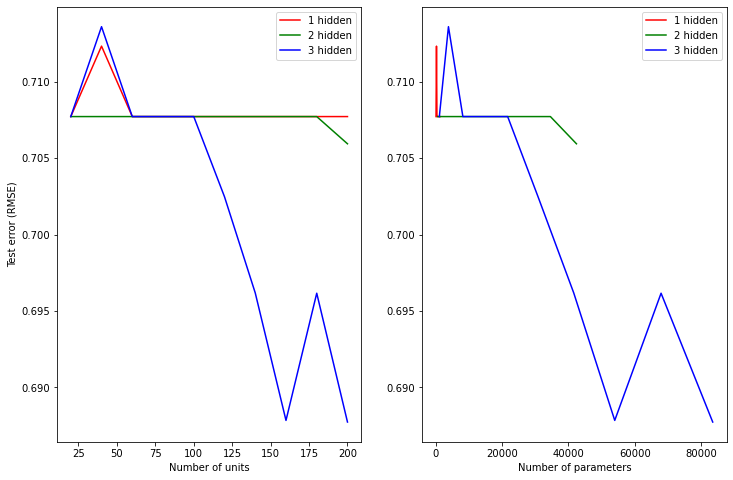

In [134]:
fig = plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.plot(units_list, rmse_1, 'r', label='1 hidden')
plt.plot(units_list, rmse_2, 'g', label='2 hidden')
plt.plot(units_list, rmse_3, 'b', label='3 hidden')
# ax1.title('Training and Validation RMSE')
plt.xlabel('Number of units')
plt.ylabel('Test error (RMSE)')
plt.legend()

plt.subplot(122)
plt.plot(params_1, rmse_1, 'r', label='1 hidden')
plt.plot(params_2, rmse_2, 'g', label='2 hidden')
plt.plot(params_3, rmse_3, 'b', label='3 hidden')
# plt.title('Training and Validation RMSE')
plt.xlabel('Number of parameters')
# plt.ylabel('Test error (RMSE)')
plt.legend()

plt.show()

## Summary
As shown, we are able to observe the performance difference among the 3 models.   
The 3 layers version performs much better to generate lower RMSE than other 2 shallow versions as the number of units increase.  